### Practica 1 - 11/04
_Mary Verdugo_

We import the libraries and the differents tools of pyhton to make figures and units from astropy: 

In [1]:
import gala.potential as gp
import astropy.units as u
import numpy as np
import gala.dynamics as gd
from gala.units import galactic
import matplotlib.pyplot as plt

We make a __composite potential__ using the function of gala `gp.CCompositePotential.`
The potential of a galaxy contents differents substructures potentials inside:
 - Disk: Miyamoto-Nagai
 - Bulge: Hernquist
 - Dark Matter halo: Navarro Frenk and White

In [2]:
total_potential = gp.CCompositePotential()
total_potential['disk'] = gp.MiyamotoNagaiPotential(m = 1E11 , a=3, b=0.15, units=galactic)
total_potential['bulge'] = gp.HernquistPotential(m = 3E9 , c = 0.67, units=galactic)
total_potential['dm_halo'] = gp.NFWPotential.from_circular_velocity(v_c=200*u.km/u.s,
                                             r_s=10.*u.kpc,
                                             units=galactic)

Following the tutorial of gala (https://gala.adrian.pw/en/latest/tutorials.html), we put a test star over the potential, to calculate its orbit. Also, the following plots are for the same orbit calculated with the total potential and, the countours correspond to the differents potentials shapes.

In [3]:
test_star_p = [18,-4,0]
test_star_v = [20,100,-50]

In [4]:
ics = gd.PhaseSpacePosition(pos = test_star_p*u.kpc, 
                            vel = test_star_v*u.km/u.s)
#orbital matematical derivation
orbit = gp.Hamiltonian(total_potential).integrate_orbit(ics,dt=2.,n_steps=3500)

Text(0.5, 1.0, 'countours of DM halo potential')

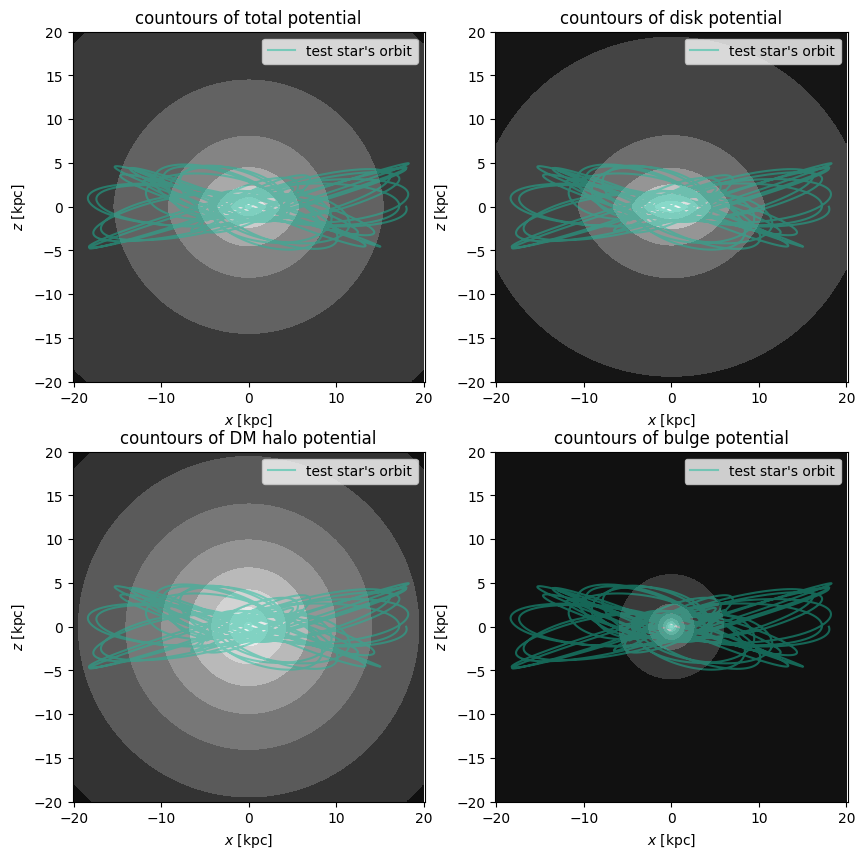

In [5]:
grid = np.linspace(-20,20,128)
fig, ax = plt.subplots(2, 2, figsize=(10,10))


fig = total_potential.plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax[0,0])
fig = orbit.plot(['x','z'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax[0,0]], auto_aspect=True, label="test star's orbit")
ax[0,0].legend()
ax[0,0].set_title('countours of total potential')

fig2 = total_potential['bulge'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax[1,1])
fig2 = orbit.plot(['x','z'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax[1,1]], auto_aspect=True, label="test star's orbit")
ax[1,1].legend()
ax[1,1].set_title('countours of bulge potential')

fig3 = total_potential['disk'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax[0,1])
fig3 = orbit.plot(['x','z'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax[0,1]], auto_aspect=True, label="test star's orbit")
ax[0,1].legend()
ax[0,1].set_title('countours of disk potential')

fig = total_potential['dm_halo'].plot_contours(grid=(grid, 0, grid), cmap='Greys', ax=ax[1,0])
fig = orbit.plot(['x','z'], color='#1ABC9C',  
                      alpha=0.5, axes=[ax[1,0]], auto_aspect=True, label="test star's orbit")
ax[1,0].legend()
ax[1,0].set_title('countours of DM halo potential')



Also, we made the rotation curve of the galaxy, considering the total potential and their components. See next figure.

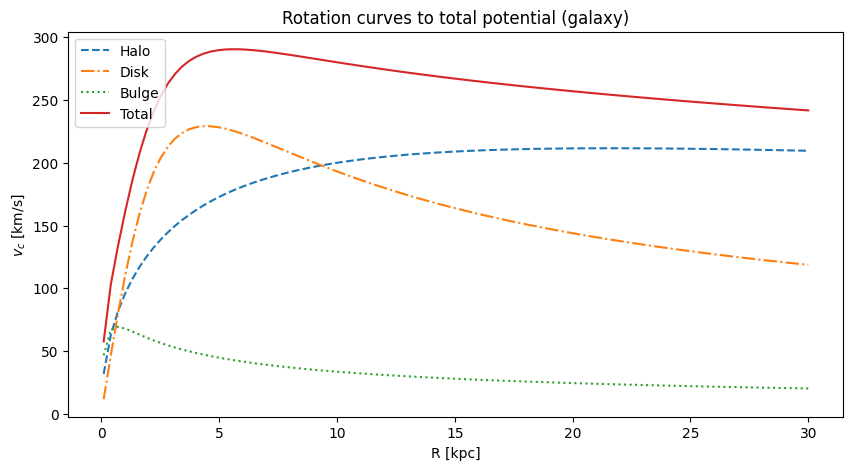

In [6]:
R_grid = np.linspace(0.1, 30, 100) * u.kpc
xyz = np.zeros((3,) + R_grid.shape) * total_potential['dm_halo'].units["length"]
xyz[0] = R_grid

vcirc_halo = total_potential['dm_halo'].circular_velocity(xyz)
vcirc_disk = total_potential['disk'].circular_velocity(xyz)
vcirc_bulge = total_potential['bulge'].circular_velocity(xyz)
#vcirc_core = core.circular_velocity(xyz)
vcirc_gal = total_potential.circular_velocity(xyz)

fig = plt.figure(figsize=(10, 5))
plt.plot(R_grid, vcirc_halo, label='Halo',linestyle='--')
plt.plot(R_grid, vcirc_disk, label='Disk',linestyle='-.')
plt.plot(R_grid, vcirc_bulge, label='Bulge',linestyle=':')
#plt.plot(R_grid, vcirc_core, label='Nucleus',linestyle='-.')
plt.plot(R_grid, vcirc_gal, label='Total')
plt.xlabel('R [kpc]')
plt.ylabel(f'$v_c$ [km/s]')
plt.title('Rotation curves to total potential (galaxy)')
plt.legend()
plt.show()

### Practica 2 - 18/04

We use 2 test star to calculate different propiertes of the potential and the orbit of its. We define `a_star` and `b_star`, their initial positions in `[x,y,z]` and their initial velocities `[d_x, d_y, d_z]`

In [7]:
#estrellas para probar los potenciales
a_star_p = [8,2,0.5]
a_star_v = [-20,80,-3]

b_star_p = [3,7,0]
b_star_v = [150,-80,-6]

#### Only considering the DM potential
We calcule the orbit of this tests stars, using only the DM halo potential. Also, we compute the total energy, potential energy, angular moment, angular moment per component, and eccentricity

In [8]:
#Dentro del halo de materia oscura
a_particle = gd.PhaseSpacePosition(pos = a_star_p*u.kpc, 
                            vel = a_star_v*u.km/u.s)
b_particle = gd.PhaseSpacePosition(pos = b_star_p*u.kpc, vel= b_star_v*u.km/u.s)

#orbital matematical derivation
a_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(a_particle, dt=0.5*u.Myr , t1=0, t2=2*u.Gyr)
b_orbit_DM = gp.Hamiltonian(total_potential['dm_halo']).integrate_orbit(b_particle, dt =0.5*u.Myr , t1=0, t2=2*u.Gyr)

#calculo de parametros practica 2
a_potentialenergy = a_orbit_DM.energy() - a_orbit_DM.kinetic_energy().to(u.kpc**2/u.Myr**2)
a_totalenergy_DM = a_orbit_DM.energy()
a_angularmoment_DM = a_orbit_DM.angular_momentum
a_Lx_DM = a_angularmoment_DM()[0]
a_Ly_DM = a_angularmoment_DM()[1]
a_Lz_DM = a_angularmoment_DM()[2] 
a_totalangularmoment = np.sqrt(a_Lx_DM**2 + a_Ly_DM**2 + a_Lz_DM**2)
a_eccentricity = a_orbit_DM.eccentricity

b_totalenergy_DM = b_orbit_DM.energy() + b_orbit_DM.kinetic_energy()
b_potentialenergy = b_orbit_DM.energy() - b_orbit_DM.kinetic_energy().to(u.kpc**2/u.Myr**2)
b_angularmoment_DM = b_orbit_DM.angular_momentum
b_Lx_DM = b_angularmoment_DM()[0]
b_Ly_DM = b_angularmoment_DM()[1]
b_Lz_DM = b_angularmoment_DM()[2] 
b_totalangularmoment = np.sqrt(b_Lx_DM**2 + b_Ly_DM**2 + b_Lz_DM**2)
b_eccentricity = b_orbit_DM.eccentricity

In [9]:
#this is another way to integrate the orbit 
a_test_orbit = total_potential['dm_halo'].integrate_orbit(a_particle, dt=0.5*u.Myr, t1=0, t2=2*u.Gyr )
b_test_orbit = total_potential['dm_halo'].integrate_orbit(b_particle, dt=0.5*u.Myr, t1=0, t2=2*u.Gyr )

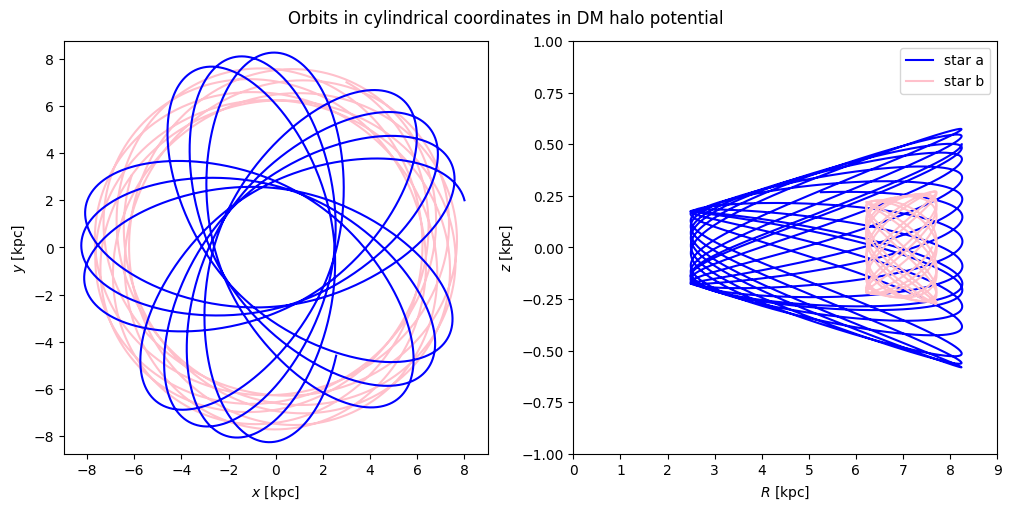

In [10]:
fig, axes = plt.subplots(1,2,figsize=(10, 5), constrained_layout = True)
fig.suptitle('Orbits in cylindrical coordinates in DM halo potential')

b_test_orbit.plot(['x','y'], color='pink', axes=axes[0])
a_test_orbit.plot(['x','y'], color='blue', axes=axes[0])
axes[0].set_xlim(-8,8)
axes[0].set_ylim(-8,8)

a_test_orbit.cylindrical.plot(
    ["rho", "z"],
    color='blue',
    axes=axes[1],
    auto_aspect=False,
    labels=["$R$ [kpc]", "$z$ [kpc]"],
    label="star a",
)
b_test_orbit.cylindrical.plot(
    ["rho", "z"],
    color='pink',
    axes=axes[1],
    auto_aspect=False,
    labels=["$R$ [kpc]", "$z$ [kpc]"],
    label="star b",
)
axes[1].set_xlim(0,9)
axes[1].set_ylim(-1,1)
axes[1].set_aspect('auto')
axes[1].legend(loc='best', fontsize=10)



The next two cells run a script to generate a gif animation using the data of the orbits extracted previously.

MovieWriter ffmpeg unavailable; using Pillow instead.
/opt/anaconda3/envs/astro/lib/python3.12/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


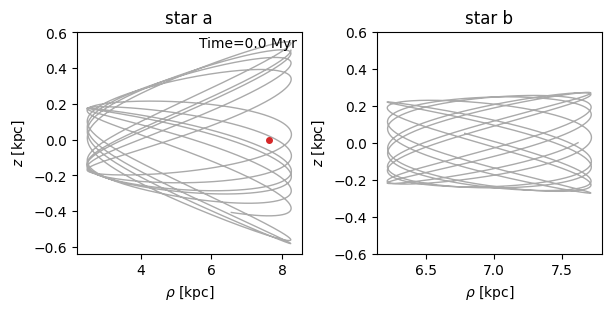

In [11]:
#Esto hace los gif de las orbitas
fig, axes = plt.subplots(1,2,figsize=(6, 3), constrained_layout = True)
fig, anim = a_test_orbit[:3000].cylindrical.animate(components=['rho', 'z'], stride=10, axes=axes[0])
fig, anim = b_test_orbit[:3000].cylindrical.animate(components=['rho', 'z'], stride=10, axes=axes[1])
#axes.legend(loc='best', fontsize=15)
axes[1].set_title('star b')
axes[1].set_ylim(-0.6,0.6)
axes[0].set_title('star a')
anim.save('animacion.gif')

Now we plot the potential energy of the particle on DM halo potential

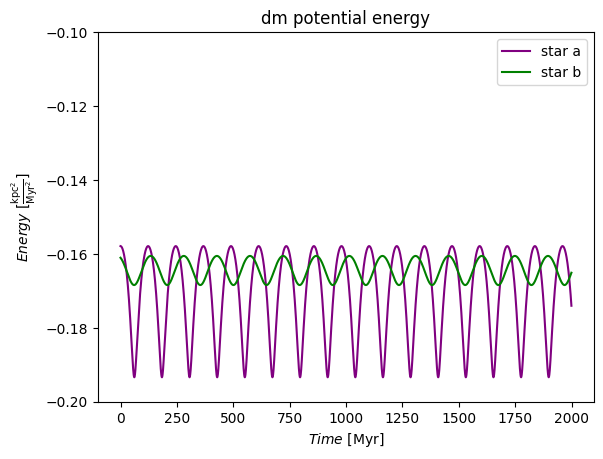

In [12]:
#calcular y graficar la evolucion temporal de energia

plt.plot(a_orbit_DM.t, a_potentialenergy, color='purple', label='star a')
plt.plot(b_orbit_DM.t, b_potentialenergy, color='green', label='star b')
plt.ylim(-0.2,-0.1)
#plt.yscale('log') 
plt.xlabel("$Time$ [{}]".format(a_orbit_DM.t.unit.to_string(format="latex")))
plt.ylabel("$Energy$ [{}]".format(a_totalenergy_DM.unit.to_string(format='latex'))) 
plt.title('dm potential energy')
plt.legend(loc='best')


Also we plot the angular moment for the stars a and b, an their different components.

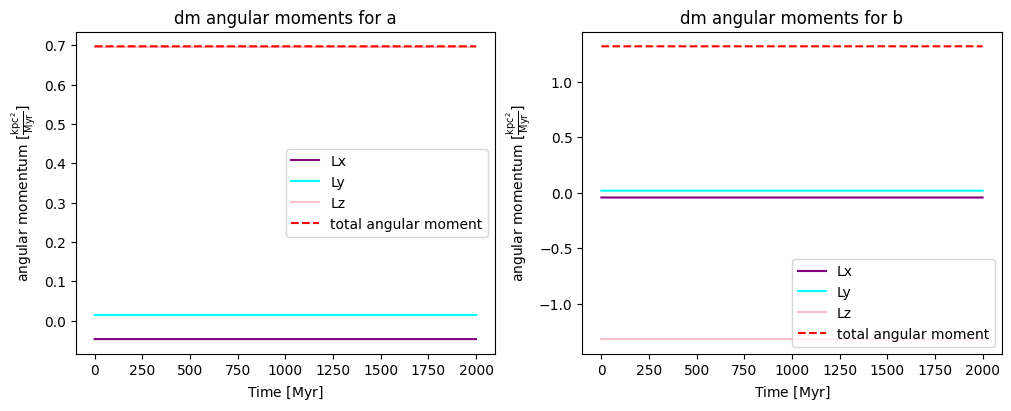

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10, 4), constrained_layout = True)
ax[0].plot(a_orbit_DM.t, a_Lx_DM, color='purple', label='Lx')
ax[0].plot(a_orbit_DM.t, a_Ly_DM, color='cyan', label='Ly')
ax[0].plot(a_orbit_DM.t, a_Lz_DM, color='pink', label='Lz')
ax[0].plot(a_orbit_DM.t, a_totalangularmoment, color='red', label='total angular moment', linestyle='--')

#ax[].ylim(-0.2,-0.1)
#ax[].yscale('log') 

ax[0].set_xlabel("Time [{}]".format(a_orbit_DM.t.unit.to_string(format='latex')))
ax[0].set_ylabel("angular momentum [{}]".format(a_Lx_DM.unit.to_string(format='latex'))) 
ax[0].set_title('dm angular moments for a')
ax[0].legend(loc='best')

#ax[].plot(b_orbit_DM.t, b_totalenergy_DM, label='total energy')
ax[1].plot(b_orbit_DM.t, b_Lx_DM, color='purple', label='Lx')
ax[1].plot(b_orbit_DM.t, b_Ly_DM, color='cyan', label='Ly')
ax[1].plot(b_orbit_DM.t, b_Lz_DM, color='pink', label='Lz')
ax[1].plot(b_orbit_DM.t, b_totalangularmoment, color='red', label='total angular moment', linestyle='--')

#ax[].ylim(-0.2,-0.1)
#ax[].yscale('log') 
ax[1].set_xlabel("Time [{}]".format(b_orbit_DM.t.unit.to_string(format='latex')))
ax[1].set_ylabel("angular momentum [{}]".format(b_Lx_DM.unit.to_string(format='latex'))) 
ax[1].set_title('dm angular moments for b')
ax[1].legend(loc='lower right')

We compute the same parameters for the stars and the total potential (i.e. bulge, disk and dm halo)

In [14]:
#agregamos el disco y otras cosas
#orbital matematical derivation
a_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(a_particle, dt=2., n_steps=5000)
b_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(b_particle, dt = 2. , n_steps = 5000)

#calculo de parametros practica 2
a_potentialenergy_total = a_orbit_total.energy() - a_orbit_total.kinetic_energy().to(u.kpc**2/u.Myr**2)
a_totalenergy_total = a_orbit_total.energy()
a_angularmoment_total = a_orbit_total.angular_momentum
a_Lx_total = a_angularmoment_total()[0]
a_Ly_total = a_angularmoment_total()[1]
a_Lz_total = a_angularmoment_total()[2] 
a_totalangularmoment_total = np.sqrt(a_Lx_DM**2 + a_Ly_DM**2 + a_Lz_DM**2)
a_eccentricity_total = a_orbit_total.eccentricity

b_totalenergy_total = b_orbit_total.energy() + b_orbit_total.kinetic_energy()
b_angularmoment_total = b_orbit_total.angular_momentum
b_Lx_total = b_angularmoment_total()[0]
b_Ly_total = b_angularmoment_total()[1]
b_Lz_total = b_angularmoment_total()[2] 
b_eccentricity_total = b_orbit_total.eccentricity

We add a 'c star' to plot the poncaire surfaces and with the aim to have a best data visualization

In [43]:
# ninguna de las orbitas srive, asi que hacemos una tercera

c_star_p = [3,3,0]
c_star_v = [190,0,0]

ics = gd.PhaseSpacePosition(pos = c_star_p*u.kpc, 
                            vel = c_star_v*u.km/u.s)
#orbital matematical derivation
c_orbit_total = gp.Hamiltonian(total_potential).integrate_orbit(ics,dt=2.,n_steps=5000)

c_potentialenergy = c_orbit_total.energy() - c_orbit_total.kinetic_energy().to(u.kpc**2/u.Myr**2)
c_totalenergy_total = c_orbit_total.energy()
c_angularmoment_total = c_orbit_total.angular_momentum
c_Lx_total = c_angularmoment_total()[0]
c_Ly_total = c_angularmoment_total()[1]
c_Lz_total = c_angularmoment_total()[2] 
c_totalangularmoment = np.sqrt(c_Lx_total**2 + c_Ly_total**2 + c_Lz_total**2)
c_eccentricity = c_orbit_total.eccentricity

Finally, we made the poincare surfaces using the condition $y=0$ and $\dot{y} > 0$. This was the reason for the star c (the a and b stars, dont has the initial conditions to the poincares surfaces proposed)

In [44]:
position_x_c = c_orbit_total.x.value
velocity_x_c = c_orbit_total.vel.d_x.value
position_y_c = c_orbit_total.y.value
velocity_y_c = c_orbit_total.vel.d_y.value
position_z_c = c_orbit_total.z.value
velocity_z_c = c_orbit_total.vel.d_z.value
delta = 0.2

poincare_index_c = np.where((position_y_c >= -delta) & (position_y_c <= delta) & (velocity_y_c > 0))[0]
#poincare_index_c = np.where((position_y_c == 0) & (velocity_y_c > 0))[0]

poincare_position_x_c = position_x_c[poincare_index_c]
poincare_velocity_x_c = velocity_x_c[poincare_index_c]
poincare_velocity_y_c = velocity_y_c[poincare_index_c]
poincare_position_y_c = position_y_c[poincare_index_c]
poincare_position_z_c = position_z_c[poincare_index_c]
poincare_velocity_z_c = velocity_z_c[poincare_index_c]

In [45]:
position_x_a = a_orbit_total.x.value
velocity_x_a = a_orbit_total.vel.d_x.value
position_y_a = a_orbit_total.y.value
velocity_y_a = a_orbit_total.vel.d_y.value
position_z_a = a_orbit_total.z.value
velocity_z_a = a_orbit_total.vel.d_z.value
delta = 0.2

poincare_index_a = np.where((position_y_a >= -delta) & (position_y_a <= delta) & (velocity_y_a > 0))[0]
#poincare_index_a = np.where((position_y_a == 0) & (velocity_y_a > 0))[0]

poincare_position_x_a = position_x_a[poincare_index_a]
poincare_velocity_x_a = velocity_x_a[poincare_index_a]
poincare_velocity_y_a = velocity_y_a[poincare_index_a]
poincare_position_y_a = position_y_a[poincare_index_a]
poincare_position_z_a = position_z_a[poincare_index_a]
poincare_velocity_z_a = velocity_z_a[poincare_index_a]

In [46]:
position_x_b = b_orbit_total.x.value
velocity_x_b = b_orbit_total.vel.d_x.value
position_y_b = b_orbit_total.y.value
velocity_y_b = b_orbit_total.vel.d_y.value
position_z_b = b_orbit_total.z.value
velocity_z_b = b_orbit_total.vel.d_z.value
delta = 0.2

poincare_index_b = np.where((position_y_b >= -delta) & (position_y_b <= delta) & (velocity_y_b > 0))[0]
#poincare_index_b = np.where((position_y_b == 0) & (velocity_y_b > 0))[0]

poincare_position_x_b = position_x_b[poincare_index_b]
poincare_velocity_x_b = velocity_x_b[poincare_index_b]
poincare_velocity_y_b = velocity_y_b[poincare_index_b]
poincare_position_y_b = position_y_b[poincare_index_b]
poincare_position_z_b = position_z_b[poincare_index_b]
poincare_velocity_z_b = velocity_z_b[poincare_index_b]

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_40287/2214940492.py:5: SyntaxWarning: invalid escape sequence '\d'
  plt.ylabel('$\dot{x}$')


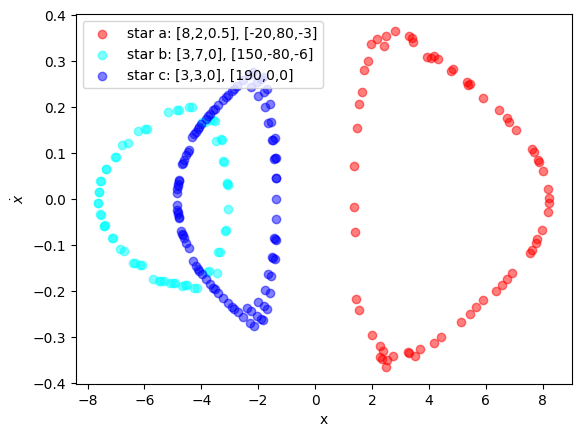

In [48]:
plt.scatter(poincare_position_x_a, poincare_velocity_x_a,color='red', alpha=0.5, label='star a: [8,2,0.5], [-20,80,-3]')
plt.scatter(poincare_position_x_b, poincare_velocity_x_b, color='cyan', alpha=0.5, label='star b: [3,7,0], [150,-80,-6]')
plt.scatter(poincare_position_x_c, poincare_velocity_x_c, color = 'blue', alpha=0.5, label='star c: [3,3,0], [190,0,0]')
plt.xlabel('x')
plt.ylabel('$\dot{x}$')


plt.legend()

In [ ]:
position_x = closed_orbit.x.value
velocity_x = closed_orbit.vel.d_x.value
position_y = closed_orbit.y.value
velocity_y = closed_orbit.vel.d_y.value
position_z = closed_orbit.z.value
velocity_z = closed_orbit.vel.d_z.value
delta = 0.2

poincare_index = np.where((position_y >= -delta) & (position_y <= delta) & (velocity_y > 0))[0]
#poincare_index = np.where((position_y == 0) & (velocity_y > 0))[0]

poincare_position_x = position_x[poincare_index]
poincare_velocity_x = velocity_x[poincare_index]
poincare_position_z = position_z[poincare_index]
poincare_velocity_z = velocity_z[poincare_index]

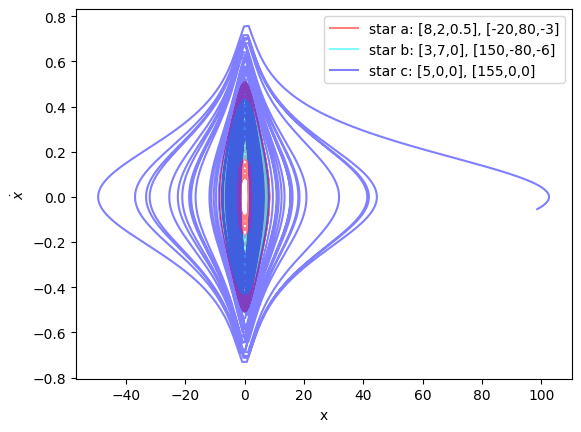

In [ ]:
#graficos para distintas estrellas creadas con posiciones iniciales disntintas

plt.plot(a_orbit_total.pos.x, a_orbit_total.vel.d_x, color='red', alpha=0.5, label='star a: [8,2,0.5], [-20,80,-3]')
plt.plot(b_orbit_total.pos.x, b_orbit_total.vel.d_x, color='cyan', alpha=0.5, label='star b: [3,7,0], [150,-80,-6]')
plt.plot(c_orbit_total.pos.x, c_orbit_total.vel.d_x, color = 'blue', alpha=0.5, label='star c: [5,0,0], [155,0,0]')
plt.xlabel('x')
plt.ylabel('$\dot{x}$')


plt.legend()


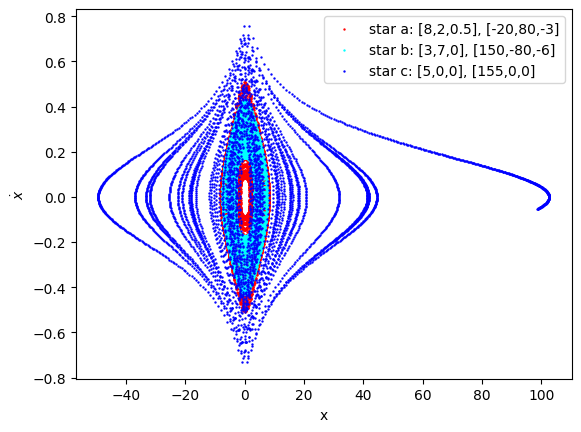

In [ ]:
#graficos para distintas estrellas creadas con posiciones iniciales disntintas
plt.scatter(a_orbit_total.pos.x, a_orbit_total.vel.d_x, color='red', s=0.5, label='star a: [8,2,0.5], [-20,80,-3]')
plt.scatter(b_orbit_total.pos.x, b_orbit_total.vel.d_x, color='cyan', s=0.5, label='star b: [3,7,0], [150,-80,-6]')
plt.scatter(c_orbit_total.pos.x, c_orbit_total.vel.d_x, color = 'blue', s=0.5, label='star c: [5,0,0], [155,0,0]')
plt.xlabel('x')
plt.ylabel('$\dot{x}$')

plt.legend()